In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

churn rate (sometime called attrition rate) in it's broaded sense , is a measure of the number of individuals or items moving out of a collective group over a specific period. it is one or two primary factors that determines the steady-state-level of customers a business will support. the term is used in many context but is most widely applied in business with respect to a customer contractual base. for example in businesses a subscriber-based service model such as mobile telephone network and pay TV operators, the term is also used to refer to participant turnover in peer to peer networks. churn rate is an input into customer lifetime value modeling, and can be part of a simulator used to return on marketing investment using marketing mix modeling.

## Importing Dataset

In [87]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


this dataset are contains the details of the customer in which both numerical and catagorical data are present, here churn is the target variable which contains 2 categories so it will be termed as a 'classification problem' where we need to predict the saveral churn using the classification model.

In [88]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [89]:
# checking the dimension of data
df.shape

(7043, 21)

## Exploratory Data Analysis (EDA)

In [90]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [91]:
# checking the columns of dataset
df.columns.tolist()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [92]:
# checking the data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [93]:
# checking the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


as we can see that there is not null values present in datasets

<Axes: >

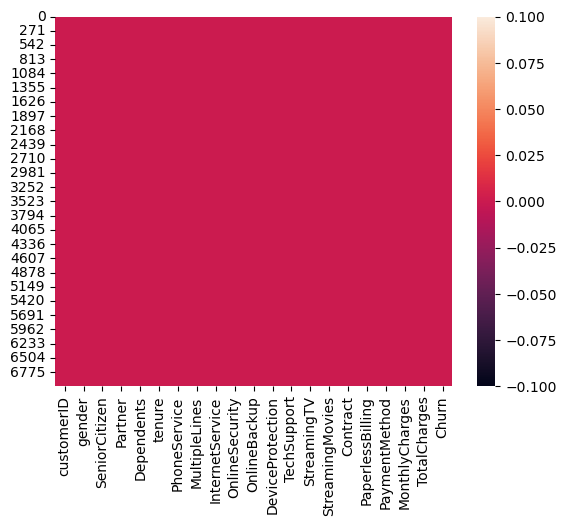

In [95]:
# lets visualize it using heatmap
sns.heatmap(df.isnull())

As we can say that there is no missing data present

In [96]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [97]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [98]:
for i in df.columns:
    b = df[i].value_counts()
    print(b)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: count, dtype: int64
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    15

these are the value counts of all columns and we can see blank in total charges columns . lets check out the unique value of that columns.

we can notice that "TotalCharges" has continous data but it's reflecting as an object data type and 11 record of this column has blank data , lets handel this column

In [99]:
# checking the space in TotalCharges column
df.loc[df['TotalCharges']==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


By locating the TotalCharges we can find this column has white spaces but it was showing 0 missing values in this columns so let's fill this column by some value 

In [100]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df['TotalCharges'].value_counts()

TotalCharges
20.2      11
19.75      9
20.05      8
19.9       8
19.65      8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6530, dtype: int64

In [101]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
# converting object data type to float data type
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

now we can see total charges has some space values which is replaced by nan values , now we will handel null values.

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now replacing the NaN value using mean method as the data has continous values.

In [105]:
np.mean(df['TotalCharges'])

2283.3004408418656

In [106]:
# filling the null value in TotalCharges with its mean

df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [107]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<Axes: >

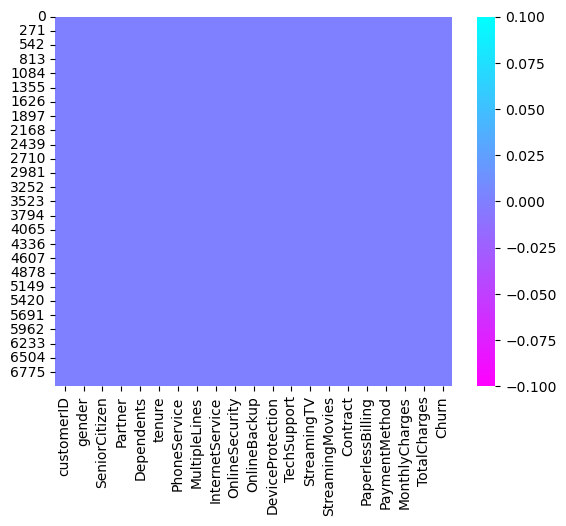

In [108]:
sns.heatmap(df.isnull(),cmap='cool_r')

In [ ]:
df.dtypes.index

now we can see there is no any null value in any column

In [109]:
#separating numerical and categorical columns
#checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] =='object':
        categorical_col.append(i)
print('categorical columns: ',categorical_col)
print('\n')

# checking for numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_col.append(i)
print('numerical column : ',numerical_col)
        

categorical columns:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


numerical column :  ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [110]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [111]:
# checking the numbers of unique value in each column
df.nunique().to_frame('no. of unique values')

,no. of unique values
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


there are the unique value present in the dataset, here customerid column has the data of unique id to the customer which can be dropped.

In [112]:
# droping customer id column
df.drop('customerID',axis=1,inplace=True)

In [113]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


## Description of Dataset

In [114]:
# statistical summary of numerical column
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


The summary of dataset looks perfect since there is no negative / invalid value present.
we observe that:
1) the count of all the columns are same which mean there are no missing values in the dataset 
2) the mean value is greater than the median (50%) in Tenure and TotalCharges column which means the data is skewed to right in these columns
3) there is huge diffrence between 75% and max hence there are outliers present in the data.
4) we can also notice that the standard deviation, min, 25% percentile values from this describe method.

## Data Visualization 

### Univariate Analysis

Churn
No     5174
Yes    1869
Name: count, dtype: int64


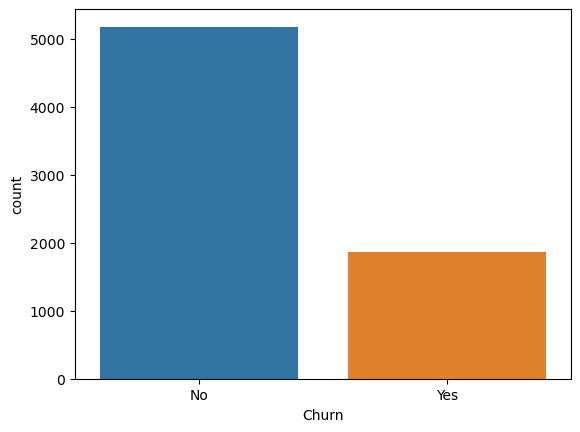

In [115]:
# visualize the number of churned customer
ax = sns.countplot(x = 'Churn',data=df)
print(df['Churn'].value_counts())

We can observe that the count of 'No Churn' are high compared to the column of 'Yes' column. i.e. there are more number of customer who have not churned. this leads to class imbalance issue in the data. we will rectify it by using oversampling method later part

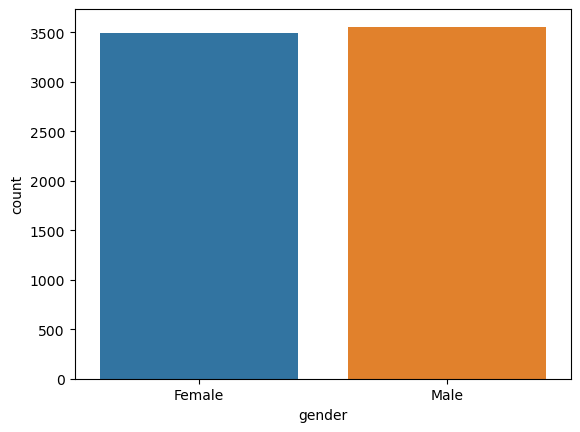

In [116]:
# visualizing the count of gender
ax = sns.countplot(x='gender', data=df)
plt.show()

the total number of males and females are same 

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


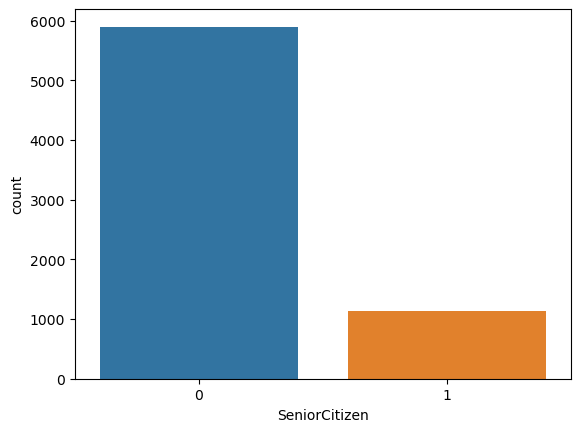

In [117]:
# visualizing the count of senior citizen
sns.countplot(x='SeniorCitizen',data=df)
print(df.SeniorCitizen.value_counts())
plt.show()


here 0 represent the non senior citizen and 1 for senior scitizen. the count of 0 is high compared to 1.

Partner
No     3641
Yes    3402
Name: count, dtype: int64


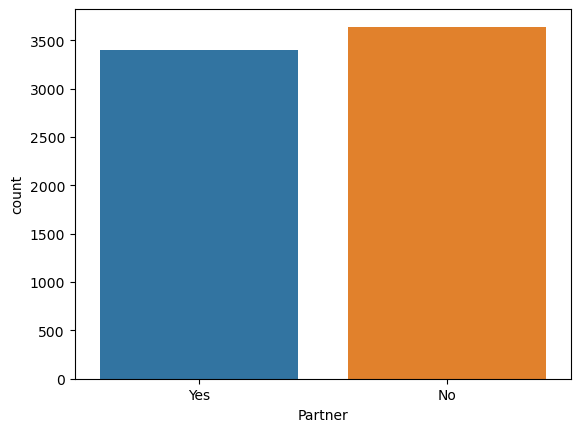

In [118]:
# visualizing the count of Partner
sns.countplot(x='Partner',data=df)
print(df.Partner.value_counts())
plt.show()


non partner are bit high in count of customer having partners.

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


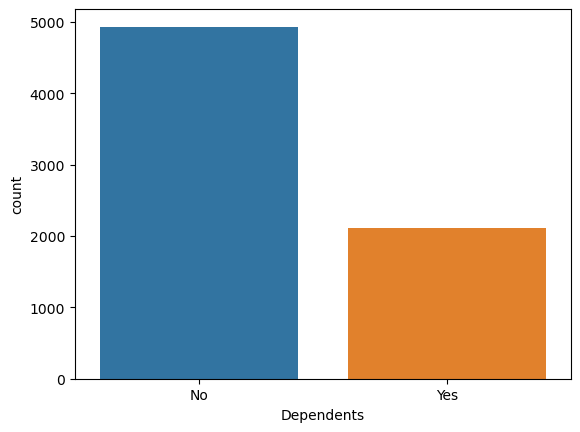

In [119]:
# visualizing the count of Dependents
sns.countplot(x='Dependents',data=df)
print(df.Dependents.value_counts())
plt.show()


the customer who have dependent are less compared to non dependents

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


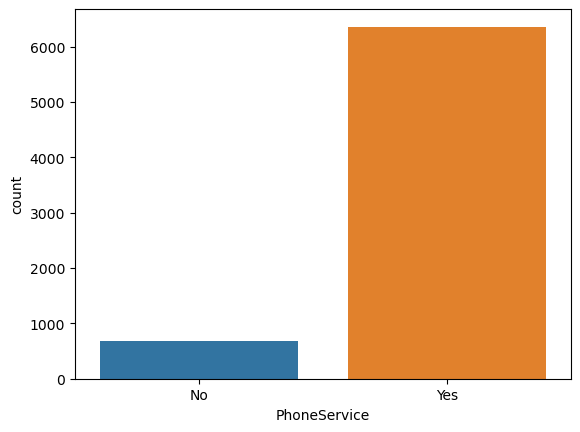

In [120]:
# visualizing the count of PhoneService
sns.countplot(x='PhoneService',data=df)
print(df.PhoneService.value_counts())
plt.show()

the customer who have phone services are larger in numbers as compared to no service

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


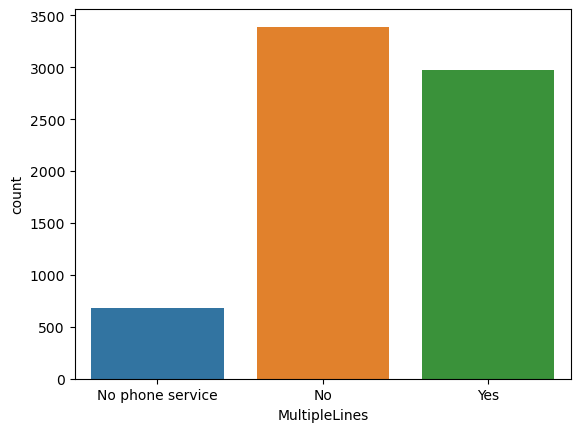

In [121]:
# visualizing the count of MultipleLines
sns.countplot(x='MultipleLines',data=df)
print(df.MultipleLines.value_counts())
plt.show()

the customer who having phoneservices from single line have high counts compared to the customers having phone services from multiple lines . also the customer who do not have phone services have covered very less data compared to others

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


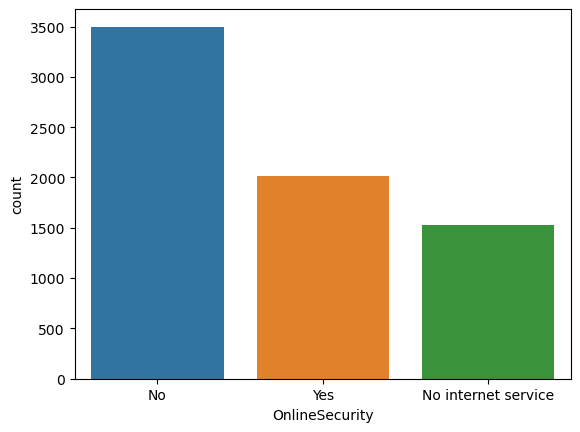

In [122]:
# visualizing the count of OnlineSecurity
sns.countplot(x='OnlineSecurity',data=df)
print(df.OnlineSecurity.value_counts())
plt.show()

the customer having no internet service needs online security and who do not have any inertnet service, they do not need any online sercurity. but from the plot we can observe the majority of the customer who ihave internet service have low online security.

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


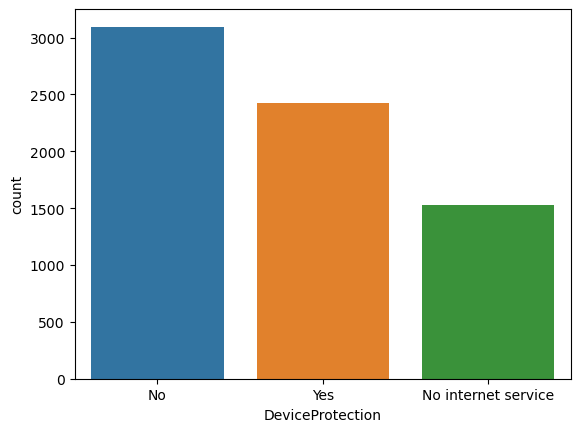

In [123]:
# visualizing the count of DeviceProtection
sns.countplot(x='DeviceProtection',data=df)
print(df.DeviceProtection.value_counts())
plt.show()

the customer who don't have internet service, they don't need any device protection.

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


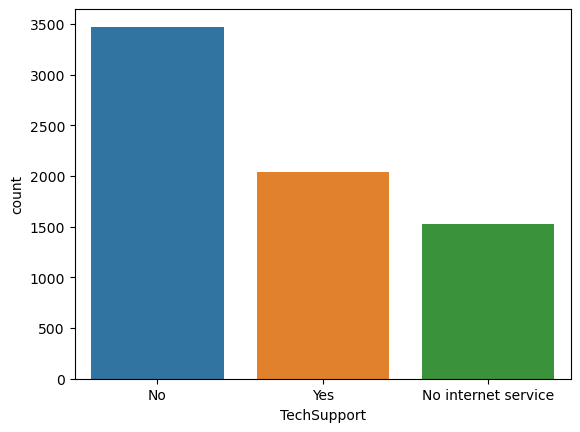

In [124]:
# visualizing the count of TechSupport
sns.countplot(x='TechSupport',data=df)
print(df.TechSupport.value_counts())
plt.show()

the customer ewho do not have any technical support are high in counts compared to the customer who need technical support 

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


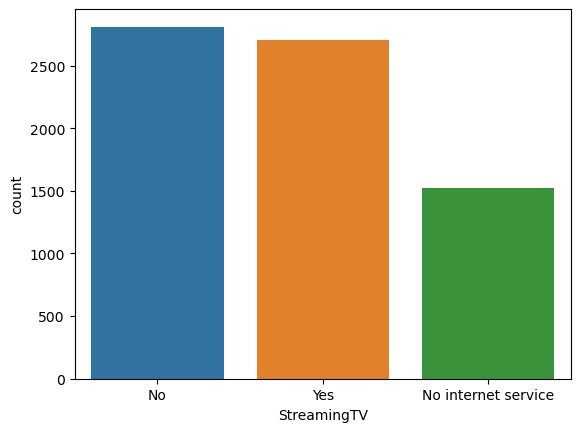

In [125]:
# visualizing the count of StreamingTV
sns.countplot(x='StreamingTV',data=df)
print(df.StreamingTV.value_counts())
plt.show()

the customer who do not use streaming TV are little bit high in number that the customer who do use streaming TV, and the customer who do not own internet they do not have this service much.

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


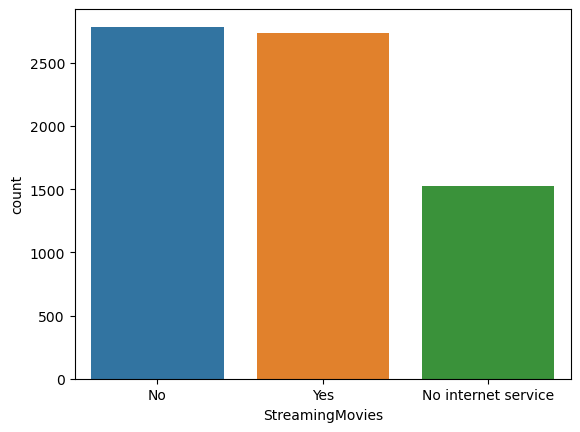

In [126]:
# visualizing the count of StreamingMovies
sns.countplot(x='StreamingMovies',data=df)
print(df.StreamingMovies.value_counts())
plt.show()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


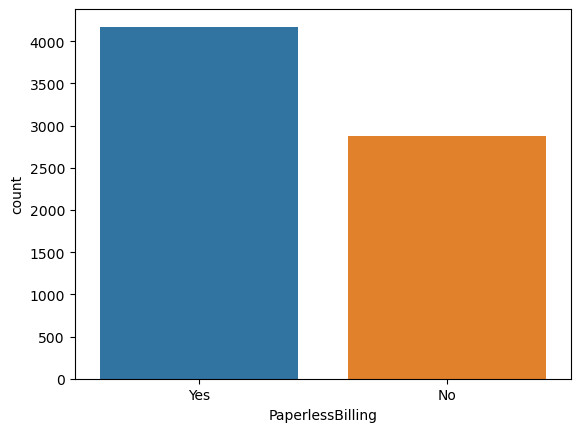

In [127]:
# visualizing the count of PaperlessBilling
sns.countplot(x='PaperlessBilling',data=df)
print(df.PaperlessBilling.value_counts())
plt.show()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


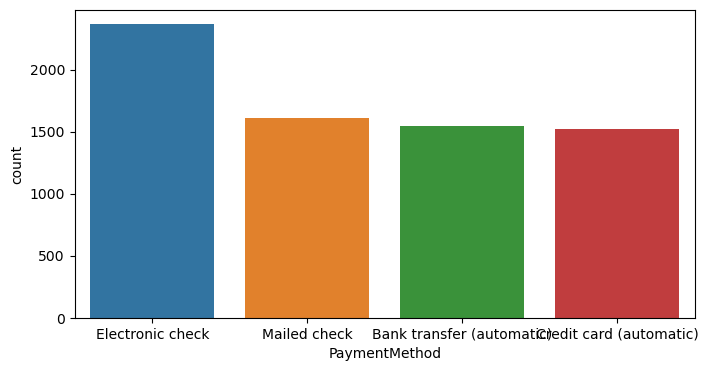

In [128]:
# visualizing the count of PaymentMethod
plt.figure(figsize=(8,4))
sns.countplot(x='PaymentMethod',data=df)
print(df.PaymentMethod.value_counts())
plt.show()

most customer prefer electronic check payment method and the customer who prefer mailed check , bank transfer and credit card have average in count.

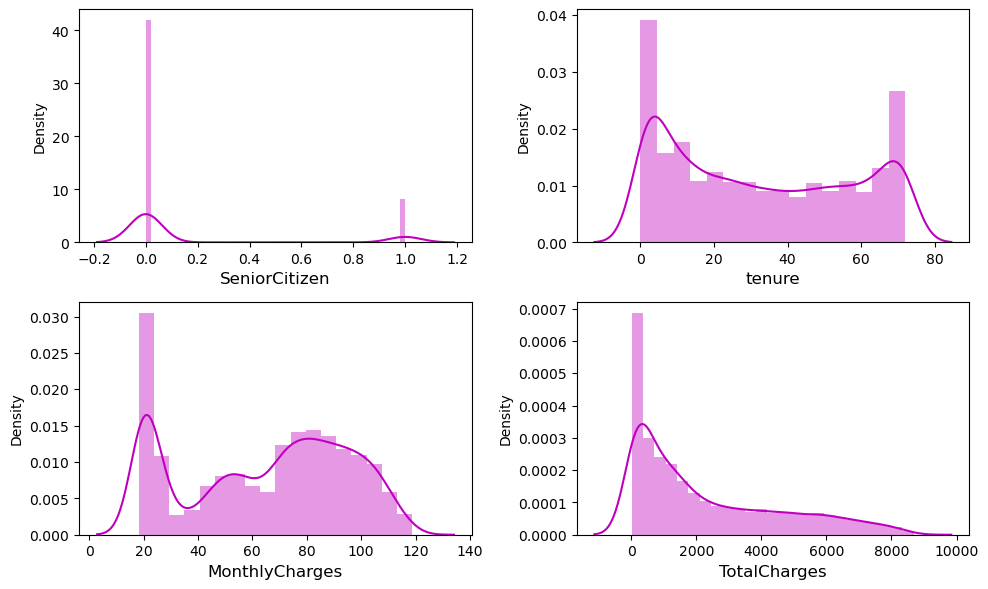

In [129]:
# let's check how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col, fontsize =12 )
        plt.yticks(rotation= 0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

from the above distribution plots we can notice that the data almost looks like normal in all column except SeniorCitizen and the data in the column TotalCharges is skewed to the right, other two column tenure and MonthlyCharges do not have skewness 

In [130]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Bivariate Analysis

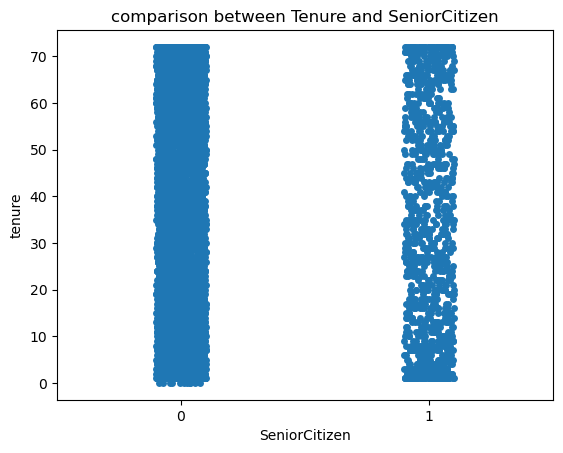

In [131]:
# comparison between Tenure and SeniorCitizen
plt.title('comparison between Tenure and SeniorCitizen')
sns.stripplot(x='SeniorCitizen',y='tenure',data=df)
plt.show()

there is no significant between the features , here both the features are in equal length

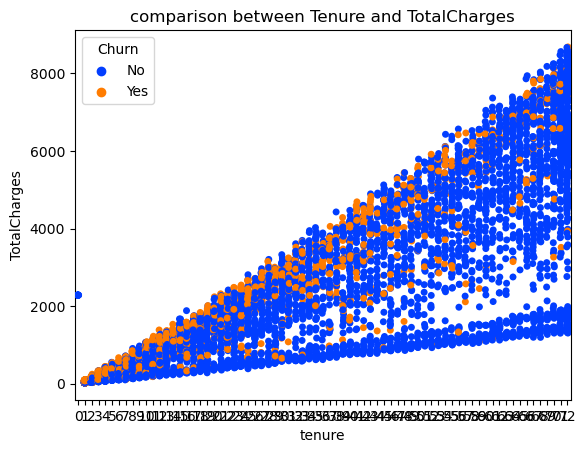

In [132]:
# comparison between Tenure and TotalCharges
plt.title('comparison between Tenure and TotalCharges')
sns.stripplot(x='tenure',y='TotalCharges',data=df, hue = 'Churn',palette='bright')
plt.show()

here we can notice the strong linear relation between the features

As the tenure increase , TotalCharges also increase rapidly. if the customers have low tenure service than there is high chance of churn

In [ ]:
# comparison between gender and SeniorCitizen
plt.title('comparison between gender and SeniorCitizen')
sns.barplot(x='gender',y='SeniorCitizen',data=df, hue = 'Churn',palette='winter_r')
plt.show()

the customers churns remains unaffected in gender and SeniorCitizen case

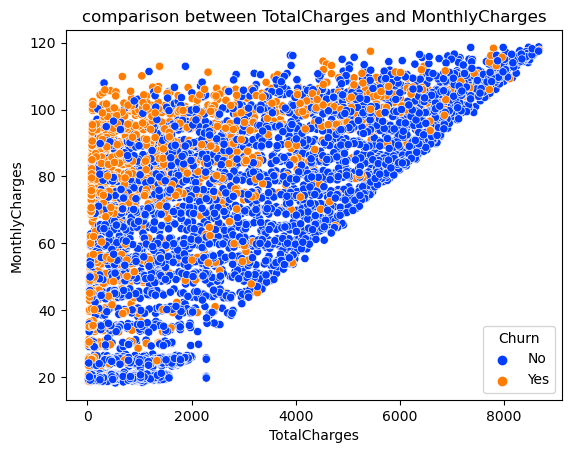

In [133]:
# comparison between TotalCharges and SeniorCitizen
plt.title('comparison between TotalCharges and MonthlyCharges')
sns.scatterplot(x='TotalCharges',y='MonthlyCharges',data=df, hue = 'Churn',palette='bright')
plt.show()

there is a liner relationship between therehe features, the customer with high monthly charges have high tendency to stop the services since they have high total charges.

also if the customer ready to contribute with the monthly charges then there is an increament in the total charges

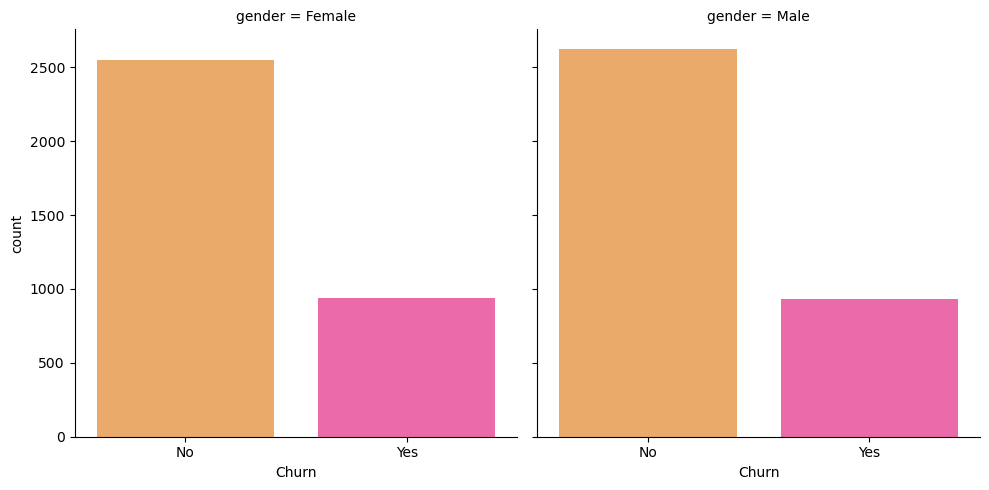

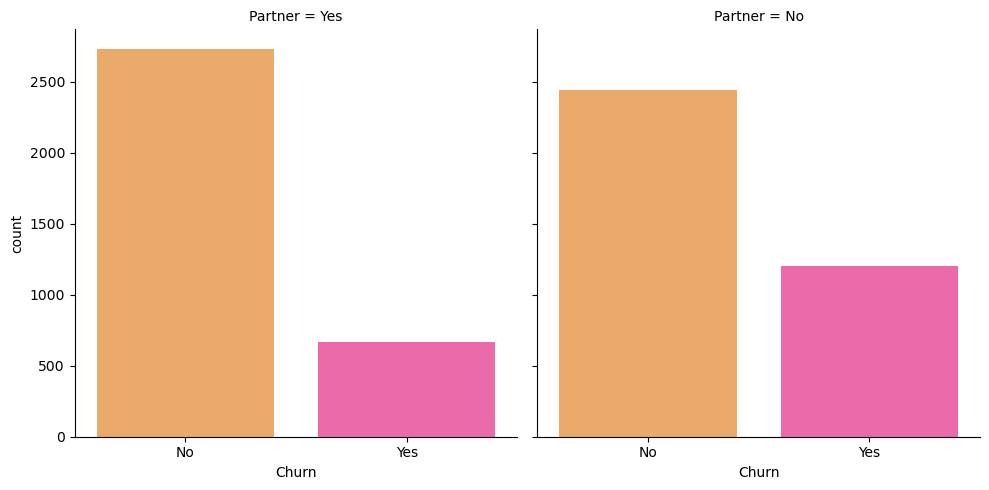

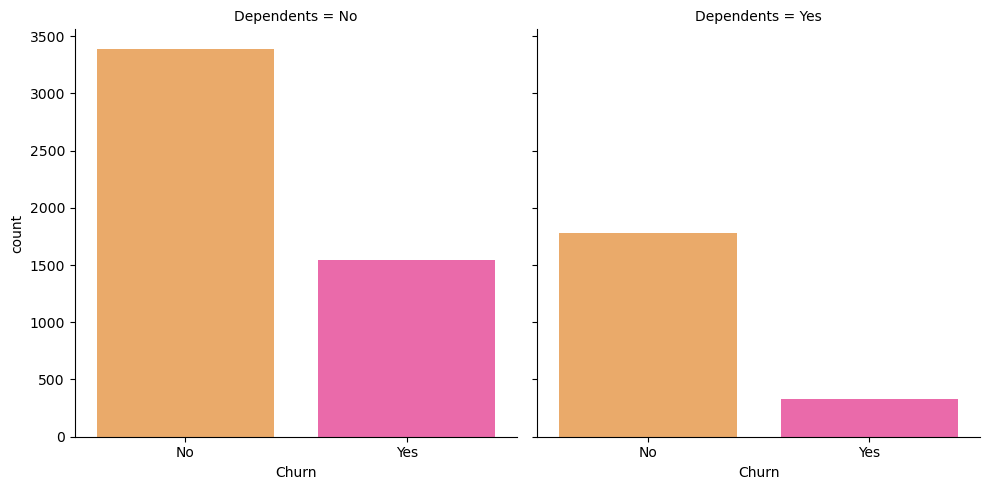

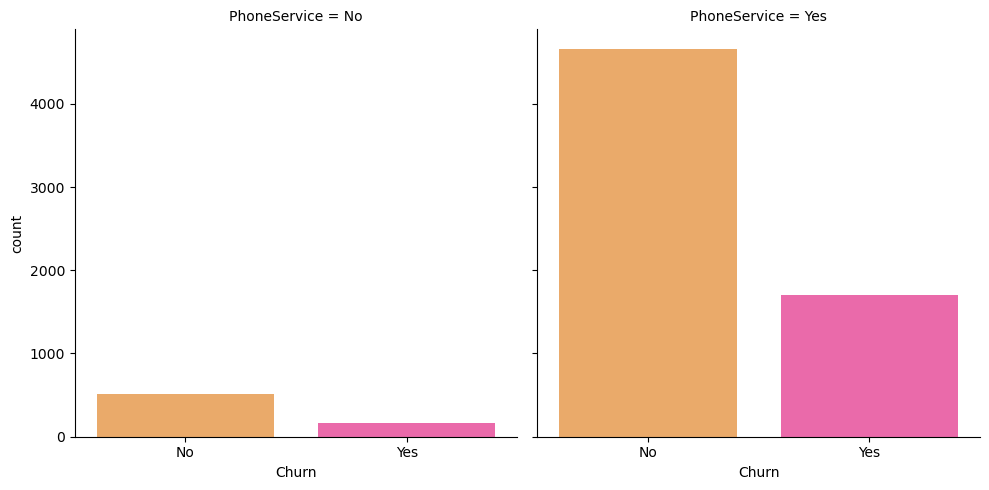

In [134]:
# checking churn level and gender
sns.catplot(x='Churn', col= 'gender',data=df, kind='count',palette='spring_r')

# checking churn level and Partner
sns.catplot(x='Churn', col= 'Partner',data=df, kind='count',palette='spring_r')

# checking churn level and Dependents
sns.catplot(x='Churn', col= 'Dependents',data=df, kind='count',palette='spring_r')

# checking churn level and PhoneService
sns.catplot(x='Churn', col= 'PhoneService',data=df, kind='count',palette='spring_r')
plt.show()

in the first plot we can see there is no significance difference in the genders. both gthe genders has same Churn_Modelling.csv

in the second plot we can see the customer without partner have high churn rate compared to the customer with partners

the customer who do not have dependency have high churn rate compared to the customer who have dependent 

in the last plot the customer who have phone serives have high tendency of getting churned

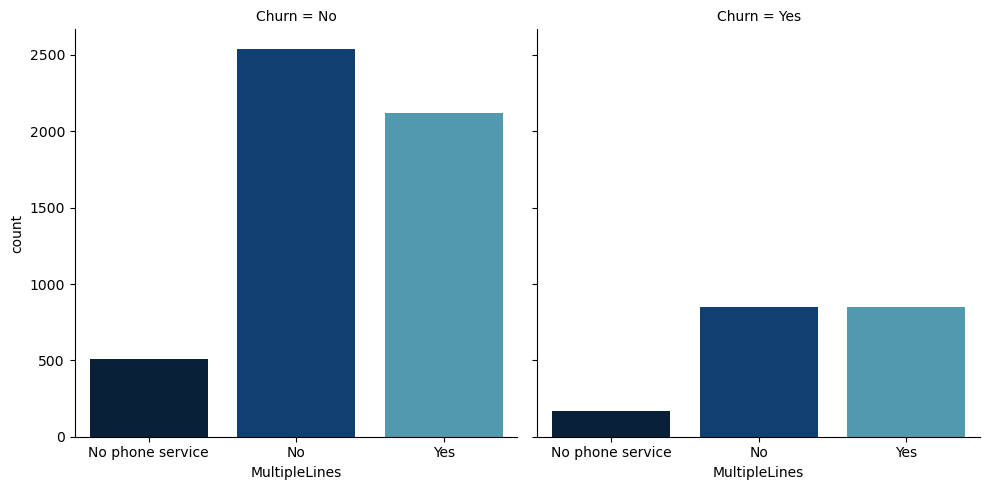

In [135]:
# checking churn level and multiple lines
sns.catplot(x='MultipleLines', col= 'Churn',data=df, kind='count',palette='ocean')
plt.show()

the customer who have phone services from single line have high churn rate compared to the customer having phone services from multiple lines, also they are very less number of customer who do not have phone services

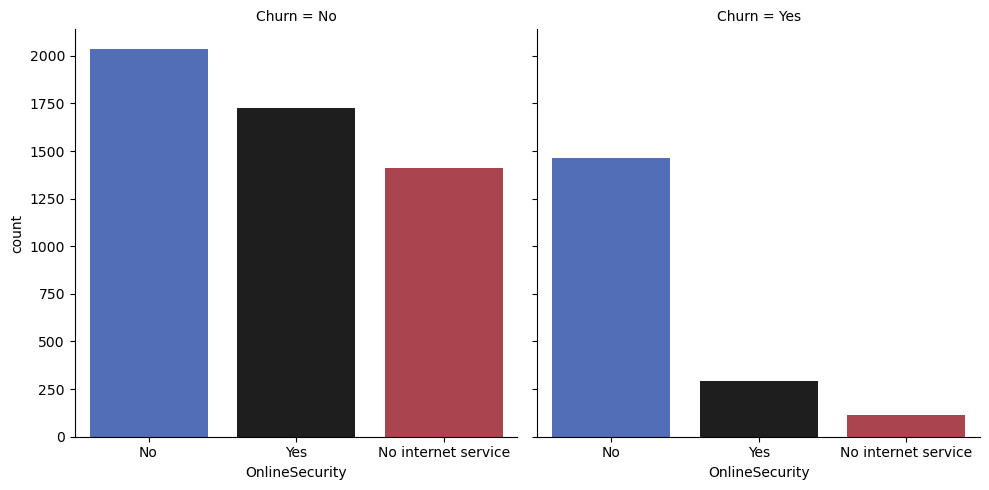

In [136]:
# checking churn level and multiple lines
sns.catplot(x='OnlineSecurity', col= 'Churn',data=df, kind='count',palette='icefire')
plt.show()

the customer who have no internet service have very less churn rate and the customer who do not have online security service have high tendancy of getting churned 

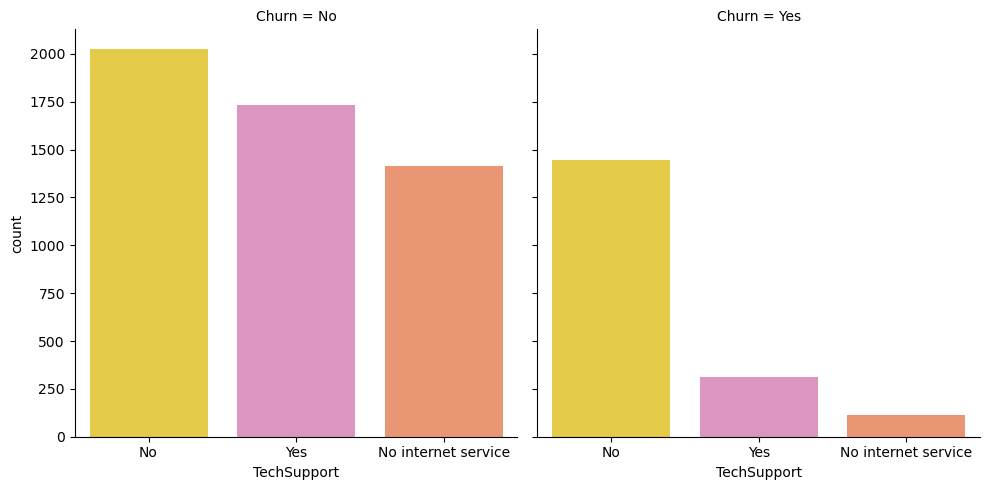

In [137]:
# checking churn level in TechSupport
sns.catplot(x='TechSupport', col= 'Churn',data=df, kind='count',palette='Set2_r')
plt.show()

the customer who do not have any tech support then they have high churn ratio.

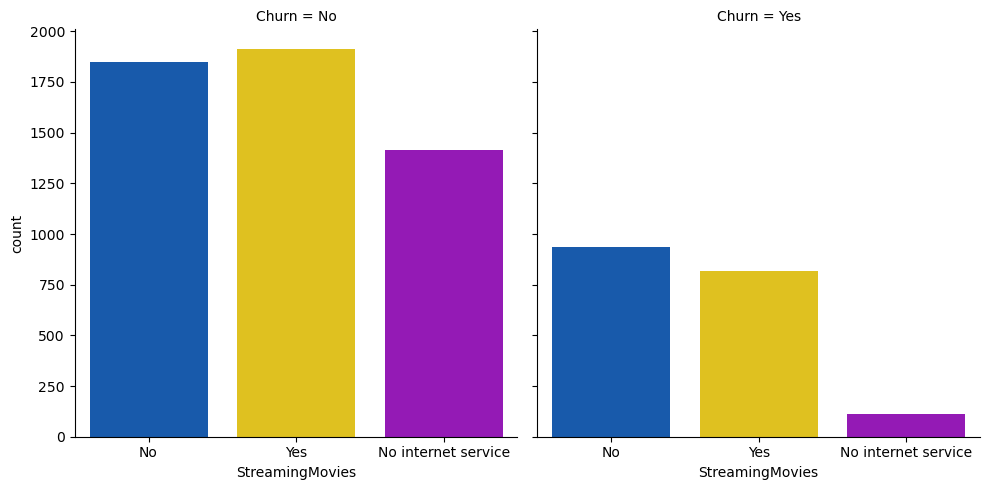

In [138]:
# checking churn level in StreamingMovies
sns.catplot(x='StreamingMovies', col= 'Churn',data=df, kind='count',palette='prism')
plt.show()

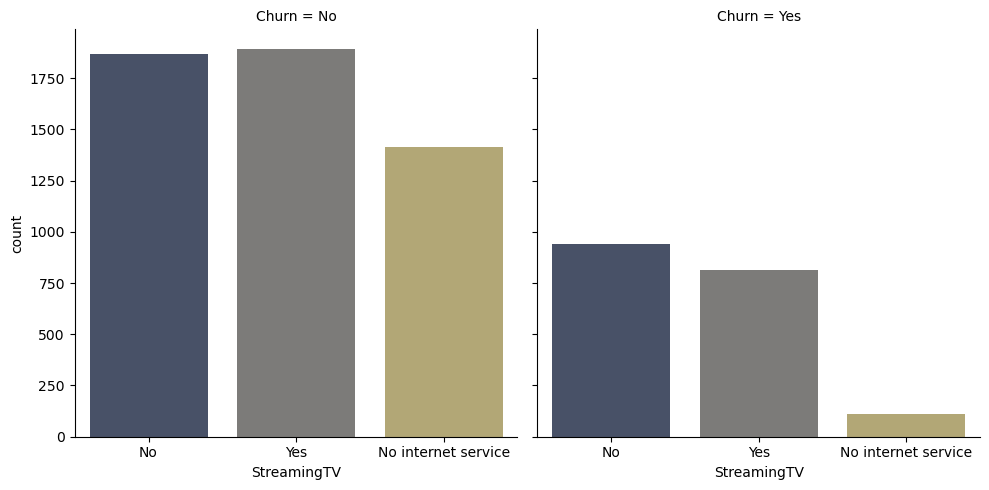

In [139]:
# checking churn level in StreamingTV
sns.catplot(x='StreamingTV', col= 'Churn',data=df, kind='count',palette='cividis')
plt.show()

### Multivariate Analysis

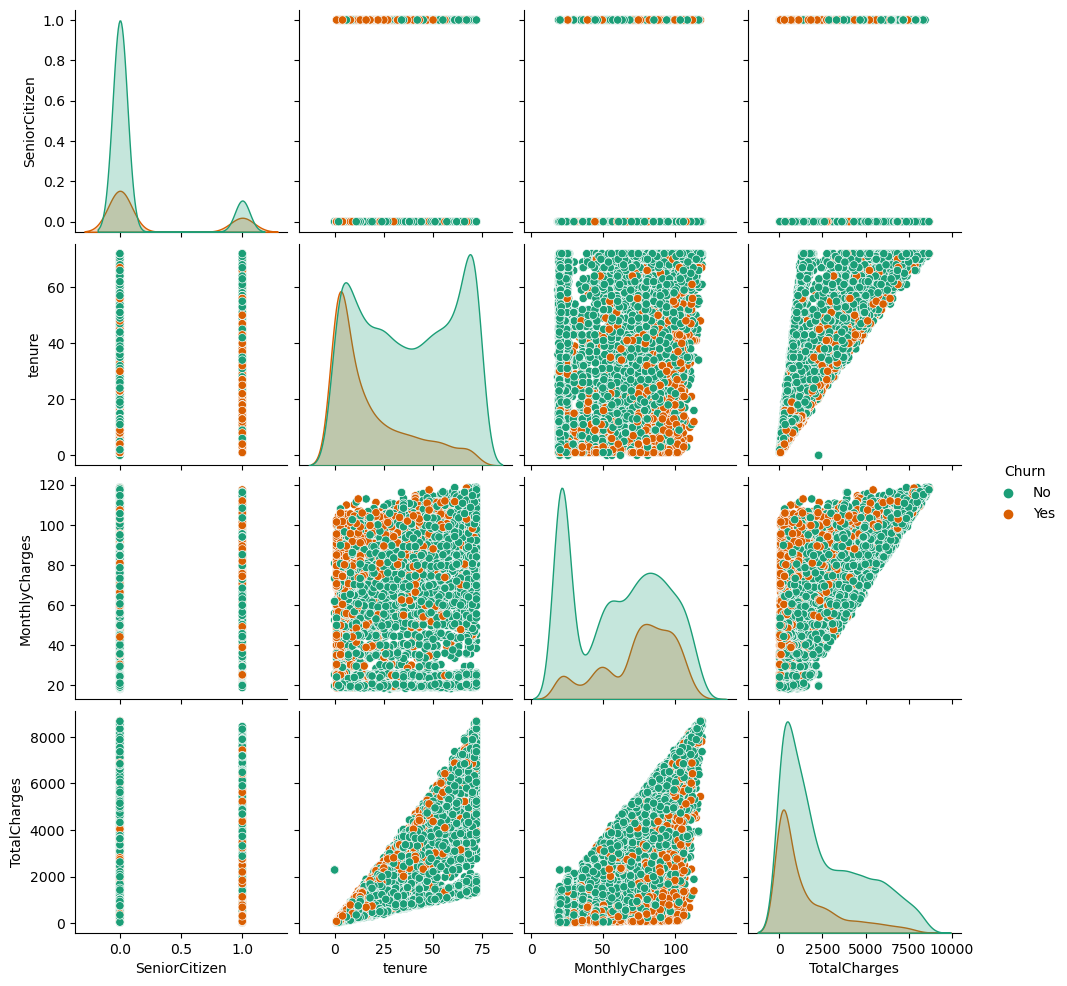

In [140]:
sns.pairplot(df, hue= 'Churn', palette='Dark2')
plt.show()

the pairplot gives the pairwise relation between the features on the basis of target 'Churn'. on the diagonal we can notice the distribution plots.

the features tenure and TotalCharges, MonthlyCharges have strong linear relation with each other.

there are no outliers in any of the columns but let's plot box plot to identify the outliers.

## Checking for outliers

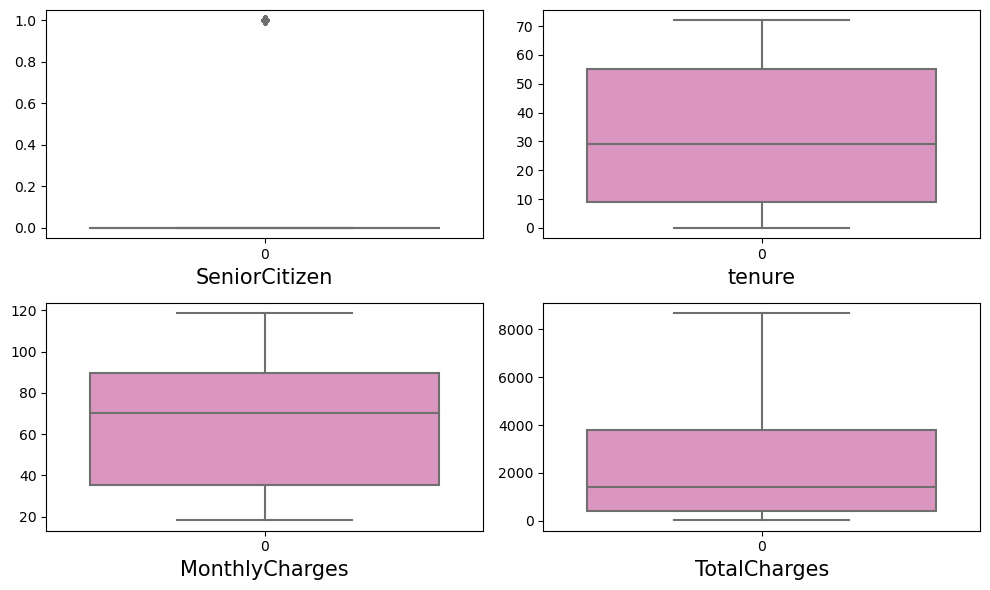

In [141]:
# lets check the outliers using the boxplot
plt.figure(figsize= (10,6),facecolor='white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col , fontsize= 15)
        plt.yticks(rotation = 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

the column senior citizen has outliers but it contains catagorical data so no need to remove outliers. Apart from this none of the column have outliers.

## Checking for skewness

In [142]:
# Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [143]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

The column SeniorCitizen and TotalCharges have skewness in the data. since sSeniorCitizen is categorical no need to remove skewness. since TotalCharges is continous in nature , lets use cube root method to remove skewness.We can not use the boxcox to remove skewness where the negative and positive value present in the column. similar for the log.we can not remove the skewness of categorical data as well as for the target variable.

basically defauls skewness is valid for -0.5 to +0.5

### removing skewness

In [144]:
# removing skewness using cuberoot method
df['TotalCharges'] = np.cbrt(df['TotalCharges'])

We have removed skewness using cube root method

In [145]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.011168
Churn               1.063031
dtype: float64

we can see the skew has been removed tin totalcharges column 

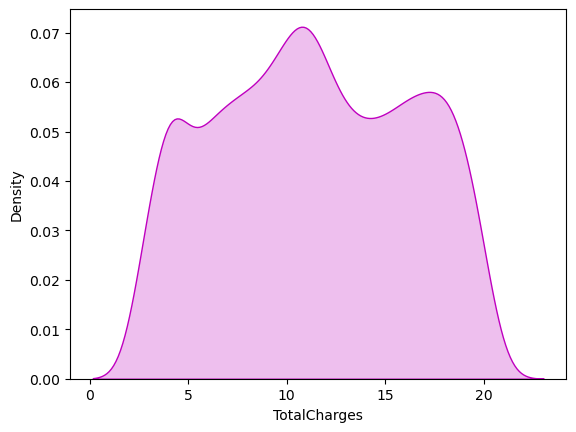

In [146]:
# lets visualization how the data has been distributed in TotalCharges after removing skewness 
sns.distplot(df['TotalCharges'],color='m',kde_kws={'shade':True},hist=False)
plt.show()

this looks almost normal and skewness is also removed 

## Encoding Categorical Column

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   float64
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   float64
 3   Dependents        7043 non-null   float64
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   float64
 6   MultipleLines     7043 non-null   float64
 7   InternetService   7043 non-null   float64
 8   OnlineSecurity    7043 non-null   float64
 9   OnlineBackup      7043 non-null   float64
 10  DeviceProtection  7043 non-null   float64
 11  TechSupport       7043 non-null   float64
 12  StreamingTV       7043 non-null   float64
 13  StreamingMovies   7043 non-null   float64
 14  Contract          7043 non-null   float64
 15  PaperlessBilling  7043 non-null   float64
 16  PaymentMethod     7043 non-null   float64


In [148]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,11.358079,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,4.896177,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,7.381699,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,11.188354,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,15.586542,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


In [149]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.001975,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.106261,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.343924,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.085055,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.868383,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.087944,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.461995,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.206969,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.246368,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.351488,-0.195525


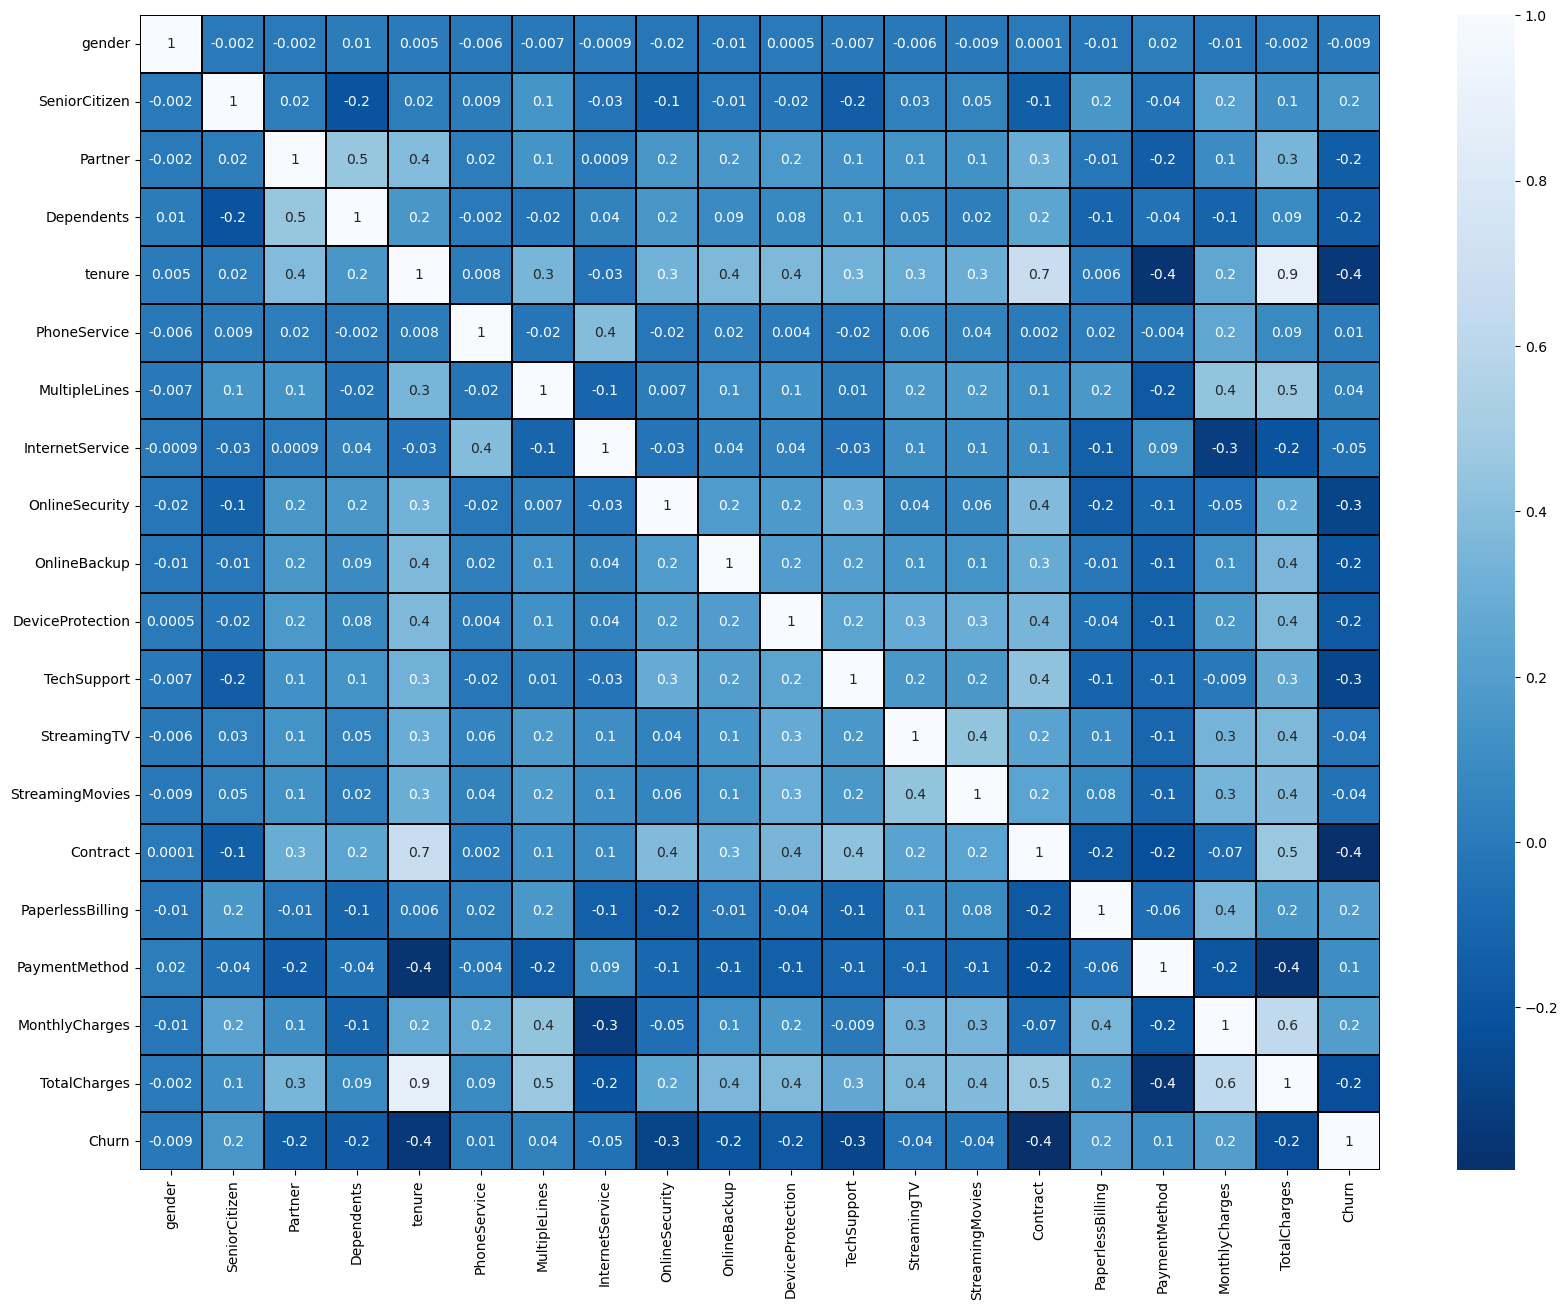

In [150]:
# visualize the correlation matrix by plotiing heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1, fmt='.1g' , linecolor='black', annot=True,cmap='Blues_r')
plt.yticks(rotation = 0)
plt.show()

In [151]:
# 0 - No relation
# -0.3 to +0.3 - less correlation
# greater than -0.5 or greater than +0.5 - moderate correlation
# greater than -0.7 or greater than +0.7 - high correlation

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label.

This heatmap contains both positive and negative correlation

1) there is no much positiveve correlation between the targets and features.
2) the column MonthlyCharges, PaperlessBilling, SeniorCitizen, and PaymentMethod, have positive correlation with the label column 'Churn'.
3) the label is negatively correlated with Contract , tenure, OnlineSecurity, TechSupport, TotalCharges, deviceprotection , online backup, partner and dependents.
4) also the column gender has very correlation with the label, we can drop it if necessary.
5) the column TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and matrixny other column have highly correlation with each other.

In [152]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.233781
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

We can observe positive and negative correlated features with target

### Visualization the correlation between label and features using bar plot

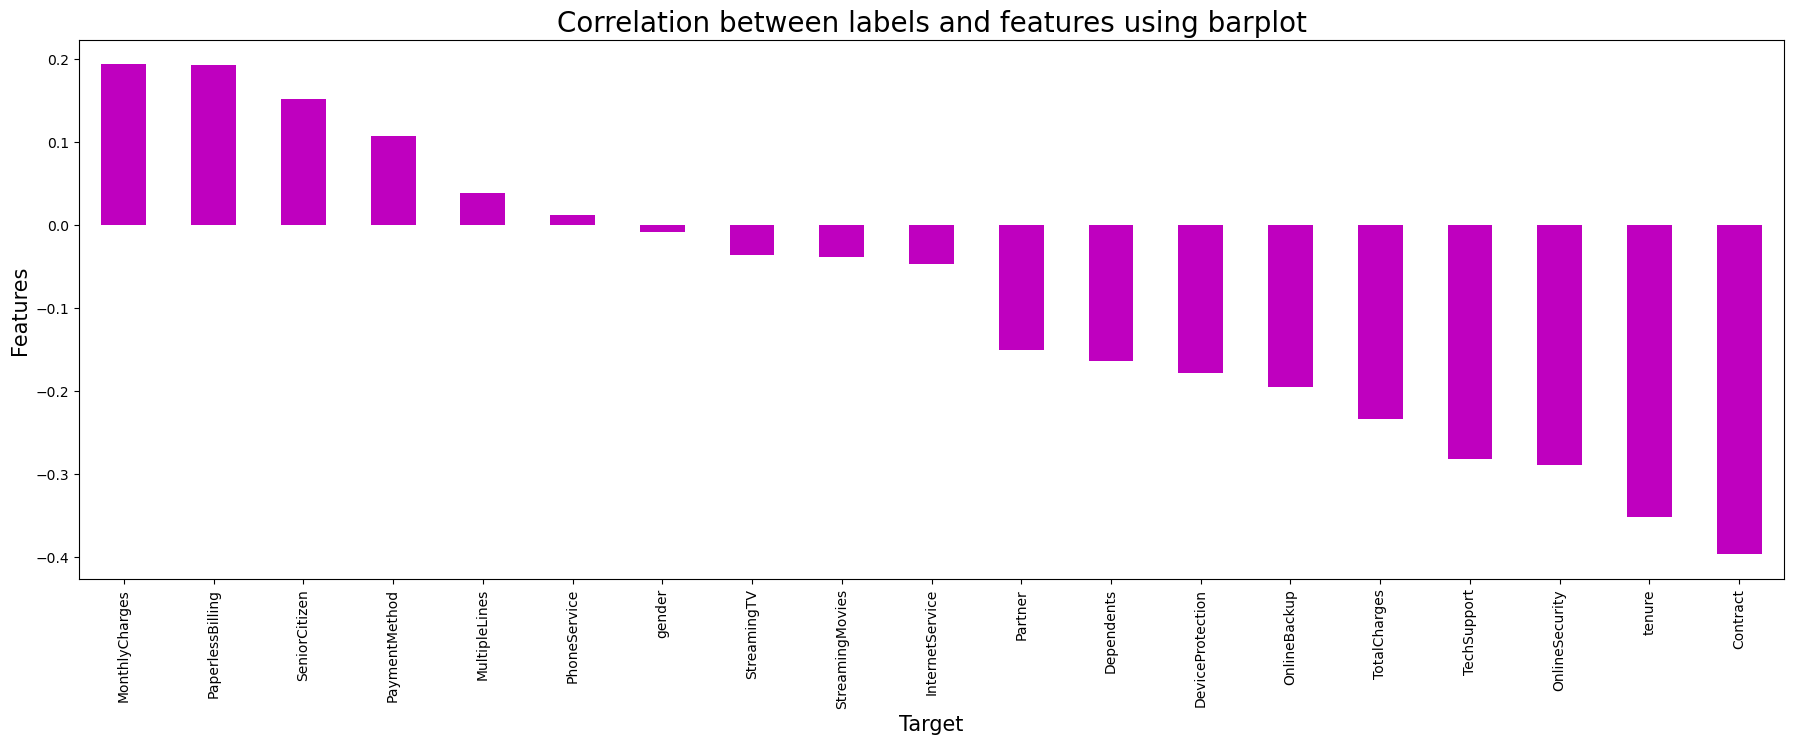

In [153]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='m')
plt.ylabel('Features', fontsize=15)
plt.xlabel('Target',fontsize=15)
plt.title('Correlation between labels and features using barplot',fontsize=20)
plt.show()

here the features gender and PhoneService have very less correlation with thee column

## Saperating features and label

In [154]:
x = df.drop('Churn',axis=1)
y= df['Churn']

## Feature Scaling using Standard Scalarization 

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.686340
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.205213
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.346794
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.183306
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.230716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.249427
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.653704
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.885384
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.942642


we have scaled the data using standard scalarization method to overcome the issue of biasness 

### Checking Variance Inflation Factor (VIF)

In [156]:
# finding varience inflation factor in each scaled column i.e. x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.001696,gender
1,1.149704,SeniorCitizen
2,1.462974,Partner
3,1.383950,Dependents
4,12.357252,tenure
5,1.622391,PhoneService
6,1.398354,MultipleLines
7,1.870013,InternetService
8,1.256219,OnlineSecurity
9,1.192694,OnlineBackup


By checking VIF values we can find the features causing multicolleniarity problem. here we can find the features TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with each others features. we will drop one of the column first, if the same issue exists then we will try to remove the column having high VIF.

In [157]:
# Droping the TotalCharges column 
x.drop('TotalCharges',axis=1,inplace = True)

In [158]:
# again checking VIF Value to confirm whether the multicolleniarity still exists or not 
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.001684,gender
1,1.149639,SeniorCitizen
2,1.460856,Partner
3,1.382106,Dependents
4,2.754468,tenure
5,1.622282,PhoneService
6,1.391652,MultipleLines
7,1.825876,InternetService
8,1.247696,OnlineSecurity
9,1.185932,OnlineBackup


So we hyave solved multicolinearity issue, now move ahead for model building 

In [159]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Here we can see that the data is not balanced , since it is a classification problem we will balance the data using oversampling method

## Oversampling 

In [160]:
# oversampling the data
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x,y)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [161]:
y.value_counts()

Churn
0.0    5174
1.0    1869
Name: count, dtype: int64

Now the data is balanced , now we can build machine learning classification models

## Modeling

### Finding the best random state

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print('Best accuracy is ', maxAccu,'at random state',maxRS)

Best accuracy is  0.8064363464268812 at random state 98


In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=98)

## Classification Algorithms 

In [164]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

### Random Forest Classifier

In [165]:
# checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.812588736393753
[[1450  145]
 [ 251  267]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.65      0.52      0.57       518

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



the accuracy for the model is 81%

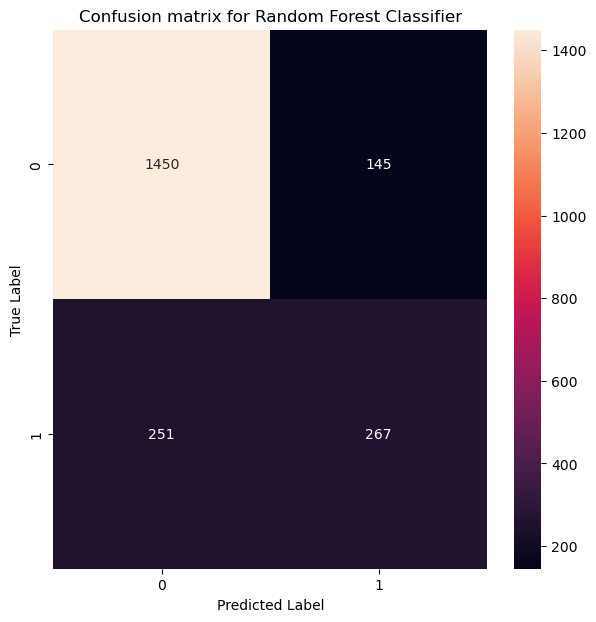

In [166]:
# lets plot confusion matrix for RandomFOrestClassifier
cm = confusion_matrix(y_test,predRFC)

x_axis_labels = ['0','1']
y_axis_labels = ['0','1']

f, ax = plt.subplots(figsize = (7,7))
sns.heatmap(cm, annot=True, linecolor='black', fmt = '.0f', ax=ax, xticklabels=x_axis_labels,yticklabels=y_axis_labels)


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

### Logistic Regression

In [167]:
# checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.812588736393753
[[1450  145]
 [ 251  267]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.65      0.52      0.57       518

    accuracy                           0.81      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



The accuracy score is 80.7 %

### Support vector machine Classifier

In [168]:
# checking accuracy for Support vector classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8045433033601515
[[1459  136]
 [ 277  241]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1595
         1.0       0.64      0.47      0.54       518

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score is 81 %

### Gradient Boosting Classifier

In [169]:
# checking accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8168480832938949
[[1457  138]
 [ 249  269]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1595
         1.0       0.66      0.52      0.58       518

    accuracy                           0.82      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.81      0.82      0.81      2113



The accuracy score is 82.00 %

### AdaBoost Classifier

In [170]:
# checking accuracy for AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8144817794604827
[[1436  159]
 [ 233  285]]
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1595
         1.0       0.64      0.55      0.59       518

    accuracy                           0.81      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.81      0.81      0.81      2113



The accuracy score is 82.00 %

### Bagging Classifier

In [171]:
# checking accuracy for BaggingClassifier
BG = BaggingClassifier()
BG.fit(x_train,y_train)
predBG = BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

0.8045433033601515
[[1454  141]
 [ 272  246]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1595
         1.0       0.64      0.47      0.54       518

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score is 79.00 %

### ExtraTrees Classifier

In [172]:
# checking accuracy for ExtraTreesClassifier
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET = BG.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8045433033601515
[[1454  141]
 [ 272  246]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1595
         1.0       0.64      0.47      0.54       518

    accuracy                           0.80      2113
   macro avg       0.74      0.69      0.71      2113
weighted avg       0.79      0.80      0.79      2113



The accuracy score is 79.00 %

## Cross Vallidation Score

In [173]:
from sklearn.model_selection import cross_val_score

In [174]:
""" cv = 5 --- it's a fold value   1,2,3,4,5 
cross_val_score(modelname,features, targetvariable, cv = foldvalue, scoring = 'accuracy')

in classification algoritms -   default scoring parameter - accuracy
for regression - default scoring parameter is - r2 score"""

" cv = 5 --- it's a fold value   1,2,3,4,5 \ncross_val_score(modelname,features, targetvariable, cv = foldvalue, scoring = 'accuracy')\n\nin classification algoritms -   default scoring parameter - accuracy\nfor regression - default scoring parameter is - r2 score"

In [175]:
# checking cv score for random forest classifier
score = cross_val_score(RFC,x,y)         # by default cv = 5 selected
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predRFC) - score.mean())

[0.79772889 0.79347055 0.77430802 0.78622159 0.79048295]
0.7884423995096458
difference blw Accuracy score and cross validation score is 0.024146336884107167


In [176]:
# checking cv score for Logistic Regression
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predLR) - score.mean())

[0.80553584 0.81547197 0.78708304 0.80539773 0.80610795]
0.8039193052777598
difference blw Accuracy score and cross validation score is 0.006303127282580978


In [177]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predGB) - score.mean())

[0.81405252 0.8012775  0.78495387 0.80397727 0.80752841]
0.8023579142202723
difference blw Accuracy score and cross validation score is 0.01449016907362266


In [178]:
# checking cv score for Support vector machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predsvc) - score.mean())

[0.79914833 0.80411639 0.78424414 0.79971591 0.80113636]
0.7976722288534744
difference blw Accuracy score and cross validation score is 0.006871074506677011


In [179]:
# checking cv score for AdaBoost Classifier
score = cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predABC) - score.mean())

[0.81121363 0.80482612 0.79914833 0.80539773 0.80752841]
0.8056228426027486
difference blw Accuracy score and cross validation score is 0.00885893685773409


In [180]:
# checking cv score for Bagging Classifier
score = cross_val_score(BG,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predBG) - score.mean())

[0.78353442 0.78140525 0.76792051 0.77201705 0.78551136]
0.7780777187237886
difference blw Accuracy score and cross validation score is 0.026465584636362838


In [181]:
# checking cv score for ExtraTrees Classifier
score = cross_val_score(ET,x,y)
print(score)
print(score.mean())
print('difference blw Accuracy score and cross validation score is',accuracy_score(y_test,predBG) - score.mean())

[0.78566359 0.77501774 0.75088715 0.76633523 0.77840909]
0.771262561294277
difference blw Accuracy score and cross validation score is 0.0332807420658745


ExtraTrees Classifier is our best model as the difference between accuracy score and cross validation score is least

## Hyper Parameter Tuning 
It is basically used genrlise performance of the model based on the parameter of perfomance

In [189]:
# AdaBoost Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
            'random_state' : [10,50,1000],
            'max_depth' : [0,10,20],
            'n_jobs': [-2,-1,1],
            'n_estimators' : [50,100,200,300]}

In [199]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv = 5)

In [ ]:
GCV.fit(x_train,y_train)

In [201]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [205]:
Final_model = ExtraTreesClassifier(criterion = 'entropy',random_state = 50, max_depth = 10,n_estimators = 100,n_jobs = 2 )
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

81.02224325603407


## Plotting ROC and compare AUC for all models used

In [206]:
## plotting for all models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection

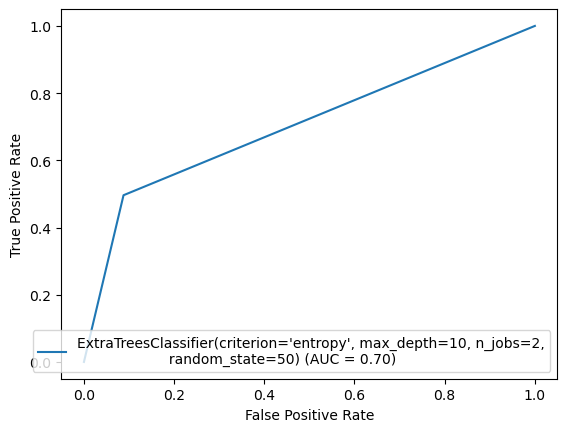

In [208]:
fpr , tpr, thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc, estimator_name = Final_model)
display.plot()

Here we have plotted the ROC curve for the final model and the AUC value for the best model is %

## Saving the Model

In [209]:
# saving the model using .pkl
import joblib
joblib.dump(Final_model,'Customer_churn_prediction.pkl')   # for serialization

['Customer_churn_prediction.pkl']

## prediction the save model

In [210]:
# lets load the saved model and get the predictions
model = joblib.load('Customer_churn_prediction.pkl')

In [211]:
# prediction
prediction = model.predict(x_test)
prediction

array([0., 0., 0., ..., 0., 0., 0.])

These are the predicted churned values of the customer

In [212]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] =prediction
df['Original'] = a
df

,Predicted,Original
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
2108,0.0,1.0
2109,0.0,0.0
2110,0.0,0.0
2111,0.0,0.0


These are the final predicted values and we can predict the churn rate as well 

# Thank You